In [ ]:
import pandas as pd
import re

# Load the data
df = pd.read_csv('data/fake_job_postings.csv', encoding='utf-8')

# Function to remove invisible/unwanted Unicode characters
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[\u200b\u200e\u200f\u00a0\u202f\ufeff]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# cleaning all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(clean_text)


In [3]:
print(df['title'].head(3))  # before
df['title'] = df['title'].apply(clean_text)
print(df['title'].head(3))  # after


0                             Marketing Intern
1    Customer Service - Cloud Video Production
2      Commissioning Machinery Assistant (CMA)
Name: title, dtype: object
0                             Marketing Intern
1    Customer Service - Cloud Video Production
2      Commissioning Machinery Assistant (CMA)
Name: title, dtype: object


In [ ]:
# List columns with potential invisible Unicode characters
suspect_cols = []

for col in df.select_dtypes(include='object').columns:
    sample = ''.join(df[col].dropna().astype(str).head(500))
    if re.search(r'[\u200b\u200e\u200f\u00a0\u202f\ufeff]', sample):
        suspect_cols.append(col)

print("Columns possibly containing invisible characters:", suspect_cols)


Columns possibly containing invisible characters: []


In [5]:
df.isnull().sum()


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
# data cleaning 
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Not Specified')
df['salary_range'] = df['salary_range'].fillna('Not Disclosed')
df['company_profile'] = df['company_profile'].fillna('Not Provided')
df['description'] = df['description'].fillna('')
df['requirements'] = df['requirements'].fillna('Not Mentioned')
df['benefits'] = df['benefits'].fillna('Not Mentioned')
df['employment_type'] = df['employment_type'].fillna('Other')
df['required_experience'] = df['required_experience'].fillna('Not Mentioned')
df['required_education'] = df['required_education'].fillna('Not Mentioned')
df['industry'] = df['industry'].fillna('Other')
df['function'] = df['function'].fillna('General')


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Disclosed,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,1,0,Other,Internship,Not Mentioned,Other,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Disclosed,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Mentioned,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Specified,Not Disclosed,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,1,0,Other,Not Mentioned,Not Mentioned,Other,General,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Disclosed,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION:Bachelor’s or Master’s in GIS, busin...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Specified,Not Disclosed,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [11]:
df.shape
df.info()
df['fraudulent'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func

fraudulent
0    17014
1      866
Name: count, dtype: int64

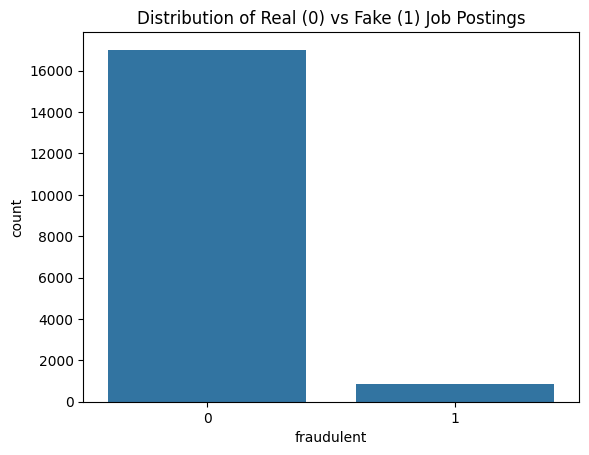

fraudulent
0    0.951566
1    0.048434
Name: proportion, dtype: float64

In [ ]:
# Distribution of Target Variable
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real (0) vs Fake (1) Job Postings')
plt.show()

df['fraudulent'].value_counts(normalize=True)


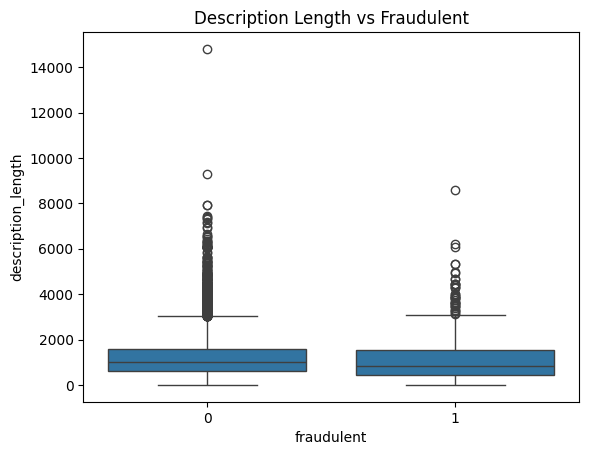

In [ ]:
# Length Features
df['description_length'] = df['description'].fillna('').apply(len)
df['requirements_length'] = df['requirements'].fillna('').apply(len)

sns.boxplot(x='fraudulent', y='description_length', data=df)
plt.title("Description Length vs Fraudulent")
plt.show()


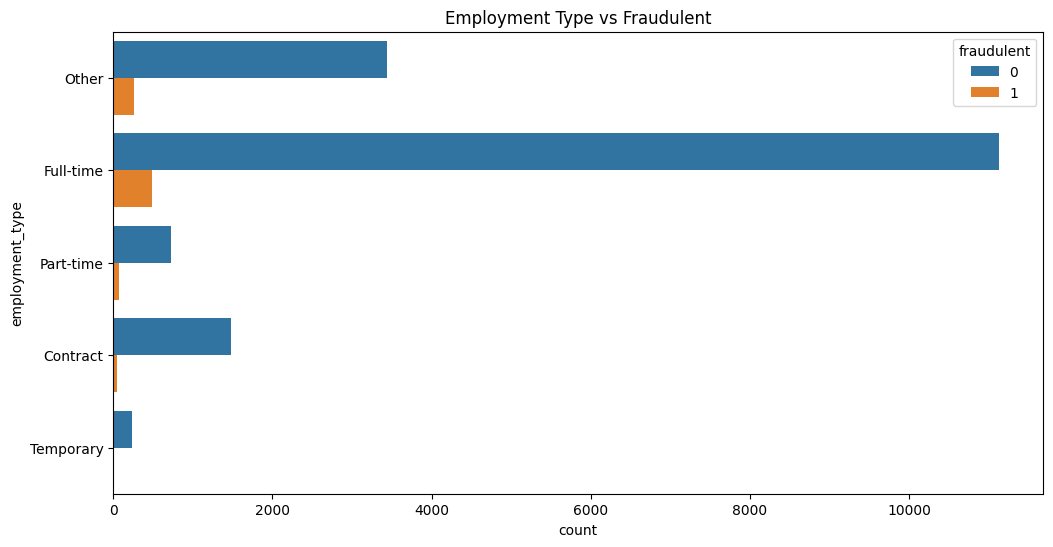

In [ ]:
# Categorical Feature Exploration
plt.figure(figsize=(12,6))
sns.countplot(y='employment_type', hue='fraudulent', data=df)
plt.title('Employment Type vs Fraudulent')
plt.show()


In [ ]:
# Saving the cleaned data 
df.to_csv('data/cleaned_fake_job_postings.csv', index=False)
